# Characteristics and Conditions of Time Series Data

In [29]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

## 1. Moving Average (MA) Forecase Example

Moving average forecase is a very classical timeseries forecasting technique. 

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./data/air_passengers.csv',
                 parse_dates = ['Month'],
                 index_col = 'Month',
                 date_parser = dateparse)

df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


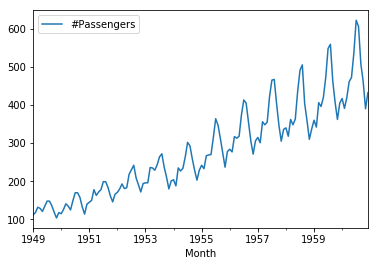

In [5]:
df.plot()

Now, let's find the optimal forecasting period: we start at 3 observations and go up to half of the dataset+1, and use this optimal n to forecast the t+1 observation.

In [9]:
optimal_n = None
best_mse = None      # criterion to decide the optimal forecasting period

db = df[['#Passengers']].values.astype('float32')

mean_results_for_all_possible_n_values = np.zeros(int(len(db)/2 - 2))

for n in range(3, int(len(db)/2 + 1)):
    
    mean_for_n = np.zeros(len(db) - n)
    
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i+n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
    
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)

print('MSE = %s' % mean_results_for_all_possible_n_values)
print('Best MSE = %s' % best_mse)
print('Optimal n = %s' % optimal_n)

MSE = [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 129

Now, we forecast the t+1 observation

In [10]:
print('MA = %s' % np.mean(db[:,0][len(db) - optimal_n:len(db)]))

MA = 427.66666


We can see form the above plot that this value is reasonable. Let's evaluate the performance of our forecasting method:

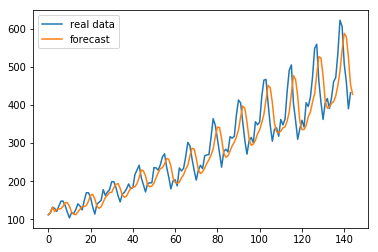

In [12]:
forecast = np.zeros(len(db) + 1)

for i in range(0, optimal_n):
    forecast[i] = db[i][0]

for i in range(0, len(db) - optimal_n + 1):
    forecast[i + optimal_n] = np.mean(db[:, 0][i:i+optimal_n])
    
plt.plot(db[:, 0], label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()

We can see that the forecasted data follow the temporal pattern of real data quite closely.

## 2. Classical Time Series Data

Let's look at a typical time series data to explore the key components of a time series data.

In [13]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./data/air_passengers.csv',
                 parse_dates = ['Month'],
                 index_col = 'Month',
                 date_parser = dateparse)

df.shape

(144, 1)

In [14]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


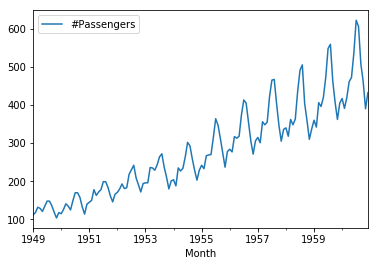

In [15]:
df.plot()

This plot represents a typical time series data. Essentialy, the main components of a time series data are:
 - trend: something which changes with time. It can go up, it can go down, it can remain flat. It tells us about the long term trends in our data. It does not repeat itself and it describes the direction in which the series is going. In the current air passenger data, we observe an upward trend.
 - cyclic component: cycles of event repeating themselves
 - seasonal component: sales going up during black friday sales, more airline passengers during holidays. Seasonality is a cycle with a period of exactly one year.
 - random component: synonymous with error
 
Now, let's plot the rolling average to see what the trend is (we know it is upwards trend, but lets see it by calculating the rolling averages)
 - rollling average: for each time point, we take the average of the points on either side of it.

Text(0.5, 0, 'Year')

<Figure size 432x288 with 0 Axes>

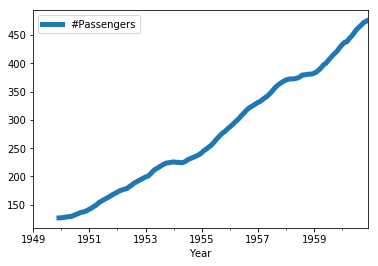

In [16]:
cdf = df[['#Passengers']]

plt.figure(figsize = (6,4))
cdf.rolling(12).mean().plot(linewidth = 5, fontsize = 10)  # 12 as the data is monthly
plt.xlabel('Year', fontsize = 10)

We note a sharp linearly increasing trend.

## 3. Seasonal Part of Time Series

In [17]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./data/air_passengers.csv',
                 parse_dates = ['Month'],
                 index_col = 'Month',
                 date_parser = dateparse)

df.shape

(144, 1)

In [18]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


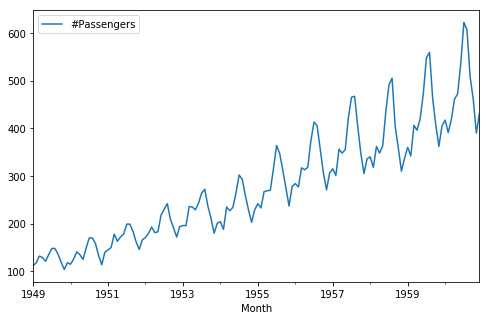

In [20]:
df.plot(figsize = (8,5))

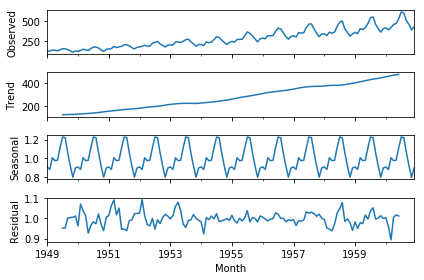

In [26]:
result = seasonal_decompose(df, model = 'multiplicative')
result.plot()
plt.show()

Thus, we can easily visualize the trend and seasonal part.

**Additive and Multiplicative Seasonality**

Above we used multiplicative seasonality. There are two types of seasonality that we need to take care of, as that will decide what decomposition model we end up adopting
 - additive seasonality: the seasonal variations are roughly constant through the series
 - multiplicative seasonality: the seasonal variations are changing proportionally to the level of the series

## 4. Testing for Stationarity: ADF Test

One of the first thing we need to do when working with time series data, whre we want to apply some of the classical technique is to check for the stationarity of the data.

In [36]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./data/air_passengers.csv',
                 parse_dates = ['Month'],
                 index_col = 'Month',
                 date_parser = dateparse)

df.shape

(144, 1)

In [30]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In order to be stationary, a data should have:
 - constant mean
 - constant variance
 - an auto co-variance that does not depend on time
 
**ADF(Augmented Dicky Fuller) Test:**
<br>Null Hypothesis (H0): If failed to be rejected (p > 0.05), it suggests the time series has a unit root, meaning it is non-stationary.

In [37]:
X = df.iloc[:,0].values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Our p-value is larger than 0.05, concluding that our data is non-stationary.

## 5. Make Time Series Stationary

Before we move on to a proper time series analysis, we need to ensure that conditions that we need for time series are met. First thing that we need to do is to make the time series data stationary. We can do that by trying to reduce the trend. One of the most common way to do so is to take log or sqrt of the data

In [38]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./data/air_passengers.csv',
                 parse_dates = ['Month'],
                 index_col = 'Month',
                 date_parser = dateparse)

df.shape

(144, 1)

In [39]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


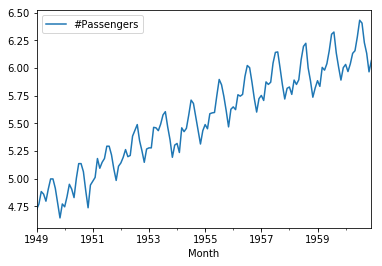

In [42]:
cdf = np.log(df)
cdf.plot()

Now, the variation across the time series seems to be uniform. Taking a log may not work everytime but it is a useful strategy worth trying.

## 6. First Order Differencing to Make Time Series Stationary

Now let's try a very simple technique called simple differencing or first order differencing to make time series data stationary.

In [43]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./data/air_passengers.csv',
                 parse_dates = ['Month'],
                 index_col = 'Month',
                 date_parser = dateparse)

df.shape

(144, 1)

In [44]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [47]:
s = df['#Passengers']       # making a series object

Let's create a function for ADF test

In [48]:
def adf_test(y):
    
    print('Results of Augmented Dicky-Fuller Test:')
    dftest = adfuller(y, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['test statistic', 'p-value', '# lags', '# observations'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
        
    print(dfoutput)

In [49]:
adf_test(s)

Results of Augmented Dicky-Fuller Test:
test statistic            0.815369
p-value                   0.991880
# lags                   13.000000
# observations          130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [50]:
sdiff = np.diff(s)    # s_(t) - s_(t-1)
adf_test(sdiff)

Results of Augmented Dicky-Fuller Test:
test statistic           -2.829267
p-value                   0.054213
# lags                   12.000000
# observations          130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


We note that the p-value has drastically come down, and is very close for the data to be considered stationary.